In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:\\Users\HP\Downloads\Crop_Recommend.csv')
import warnings
warnings.filterwarnings('ignore')

#Building the AdaBoost Model
from sklearn import preprocessing
cat_col=['label',]
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])
X=df.iloc[:,0:11].values
Y=df['label'].values

#Splitting the Dataset
#Building the AdaBoost Model:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
from sklearn.ensemble import AdaBoostClassifier
from numpy.core.umath_tests import inner1d
adb=AdaBoostClassifier(random_state=123)
model = adb.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.28      1.00      0.44        23
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        33
           5       0.94      1.00      0.97        34
           6       1.00      1.00      1.00        29
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        24
          12       0.92      1.00      0.96        35
          13       0.00      0.00      0.00        38
          14       0.14      1.00      0.24        25
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        32
          17       0.00    

Text(0, 0.5, 'Frequency')

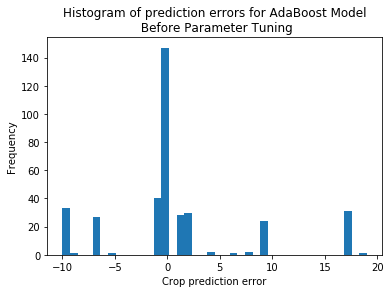

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, includue:
%matplotlib inline
diff = Y_test - y_pred
plt.hist(diff, bins = 40)
plt.title('Histogram of prediction errors for AdaBoost Model\n Before Parameter Tuning')
plt.xlabel('Crop prediction error')
plt.ylabel('Frequency')

In [3]:
"""Using SVM as a base estimator"""
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier 
svc = SVC(probability = True, kernel='linear')
adb = AdaBoostClassifier(n_estimators=100,base_estimator = svc, learning_rate= 0.01)

#Training and Predicting the AdaBoost Classifier
model = adb.fit(X_train, Y_train)
y_pred = model.predict(X_test)
#y_pred

In [4]:
#Evaluating the Model:
#print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.96      1.00      0.98        23
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        27
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.96      1.00      0.98        24
          12       0.95      1.00      0.97        35
          13       0.88      1.00      0.94        38
          14       0.96      1.00      0.98        25
          15       1.00      1.00      1.00        28
          16       0.97      1.00      0.98        32
          17       0.00      0.00      0.00         1
          19       1.00    

Text(0, 0.5, 'Frequency')

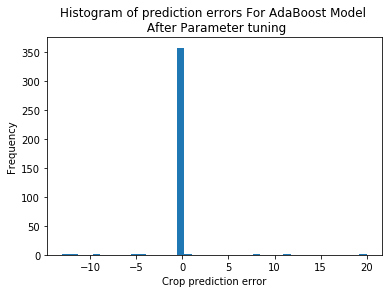

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, includue:
%matplotlib inline
diff = Y_test - y_pred
plt.hist(diff,bins = 40)
plt.title('Histogram of prediction errors For AdaBoost Model \n After Parameter tuning')
plt.xlabel('Crop prediction error')
plt.ylabel('Frequency')

In [9]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn import metrics
from numpy.core.umath_tests import inner1d
adb=AdaBoostClassifier(n_estimators=1500,random_state=400)
model=adb.fit(X_train,Y_train)


y_pred=adb.predict(X_test)
#Errors
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

#20-fold cross validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
adb_accuracies=cross_val_score(adb,X_train,Y_train,cv=20)
print('Mean_adb_Acc:',adb_accuracies.mean()) #prediction score

#Predicting and checking the accuracy
#After training the model, we can check the accuracy with the cross-validation method.

scores = cross_val_score(model, X_train,Y_train,cv=20)
print("Mean cross-validataion score: %.2f" % scores.mean())
 
#We can also apply cross-validation with a k-fold method.
kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, Y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        adb, X_train, Y_train, X_test, Y_test, 
        loss='mse',
        num_rounds=2, # Number of bootstrap rounds for implementing the decomposition
        random_seed=123
)
print('Average expected loss: %.5f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)


from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve, log_loss, brier_score_loss
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(random_state=309,n_estimators= 20)
adb.fit(X_train,Y_train)

adb_y_pred = adb.predict_proba(X_test)
adb_roc = roc_auc_score(Y_test,adb_y_pred,multi_class='ovr')
print(adb_roc)

Mean Absolute Error: 3.9755434782608696
Root Mean Squared Error: 6.705975596112185
Mean_adb_Acc: 0.264202657807309
Mean cross-validataion score: 0.26
K-fold CV average score: 0.29
Average expected loss: 44.03533
Average bias: 26.470
Average variance: 17.565
0.6330929753311271
